1. **`## Supermarket Sales — Exploratory Data Analysis`**

   * This is an EDA project on supermarket sales data.
   * Goal: explore patterns in sales, customers, and branches.

2. **`## Project Overview`**

   * Internal Practice Dataset.
   * Transactional supermarket sales.
   * High-level goal: understand revenue, customers, products, and patterns.

3. **`## Setup & Data Loading`**

   > In this section I import the libraries and load the dataset from `supermarket_sales.csv`.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('supermarket_sales.csv')

4. **`## First Look at the Data`**
   Under it, add a short text like:

   * head()
   * shape
   * dtypes
     These will go here later.



In [2]:
df.head()

,Invoice_ID,Branch,City,Customer type,Gender,Product line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,NaN,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,NaN,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Parsing Time column
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Parsing Time column
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

In [5]:
# Creating new columns after parsing Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day 
df['Weekday'] = df['Date'].dt.weekday 

In [6]:
df.shape

(1000, 21)

In [7]:
df.dtypes

Invoice_ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit_price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Year                                int32
Month                               int32
Day                                 int32
Weekday                             int32
dtype: object

In [8]:
df.head()

,Invoice_ID,Branch,City,Customer type,Gender,Product line,Unit_price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,5
1,226-31-3081,C,Naypyitaw,Normal,NaN,Electronic accessories,15.28,5,3.8200,80.2200,...,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,6
4,373-73-7910,A,Yangon,Normal,NaN,Sports and travel,86.31,7,30.2085,634.3785,...,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,4


In [9]:
df.info

<bound method DataFrame.info of       Invoice_ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal     NaN   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal     NaN   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit_price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home

In [10]:
df.describe()

,Unit_price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Weekday
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,1900-01-01 15:24:41.879999744,307.58738,4.761905,15.379369,6.97270,2019.0,1.993000,15.256000,3.032000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,1900-01-01 10:00:00,10.17000,4.761905,0.508500,4.00000,2019.0,1.000000,1.000000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,1900-01-01 12:43:00,118.49750,4.761905,5.924875,5.50000,2019.0,1.000000,8.000000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,1900-01-01 15:19:00,241.76000,4.761905,12.088000,7.00000,2019.0,2.000000,15.000000,3.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,1900-01-01 18:15:00,448.90500,4.761905,22.445250,8.50000,2019.0,3.000000,23.000000,5.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,1900-01-01 20:59:00,993.00000,4.761905,49.650000,10.00000,2019.0,3.000000,31.000000,6.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,0.000000,11.708825,1.71858,0.0,0.835254,8.693563,1.973543


5. **`## Data Cleaning`**

   * Handle missing values
   * Fix data types (dates, categories, numbers)
   * Remove obvious duplicates / errors



In [11]:
# Check missing values
df.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     2
Product line               0
Unit_price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Year                       0
Month                      0
Day                        0
Weekday                    0
dtype: int64

**`# Interpretation:`**

There are only two missing values on the same column: 'Gender'.

These should be fixed.

In [12]:
# Check duplicates
len(df.Invoice_ID.unique()) == len(df.Invoice_ID)

True

**`# Interpretation:`**

No duplicates found in the only column that would matter.

In [13]:
# Summary of new datetime columns
df[['Year', 'Month', 'Weekday', 'Day']].head()

,Year,Month,Weekday,Day
0,2019,1,5,5
1,2019,3,4,8
2,2019,3,6,3
3,2019,1,6,27
4,2019,2,4,8


6. **`## EDA Questions`**

   > Here I will define the main business questions after seeing the columns.
         
         Which Branch (A/B/C) has the highest and lowest total revenue?

         Which Branch has the highest and lowest total quantity sold (units)?

         How does revenue differ by City? (rank cities + compare distributions)

         Which Product line sells the most and least units?

         Which Product line generates the most and least revenue?

         Do Members vs Normal customers differ in average spend per invoice (Total) and quantity?

         Do customer Ratings differ by Branch and by Product line?

         What are the most and least common Payment methods overall, and how do they vary by City and Gender?

         Which weekdays are busiest (by invoices, revenue, and units), and does this pattern differ by City/Branch?

         What are the busiest hours, and do hour patterns differ between weekdays vs weekends?

7. **`## Univariate Analysis`**

   * `### 7.1 Numerical variables`
   * `### 7.2 Categorical variables`



Text(0, 0.5, 'frequency')

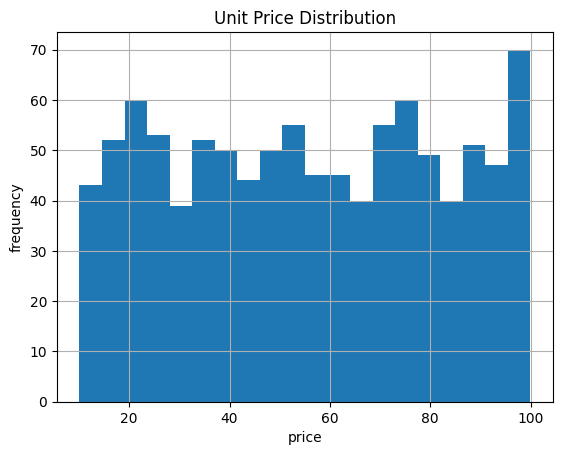

In [27]:
#7.1 Numerical variables

#Unit Price Distribution:
df['Unit_price'].hist(bins=20)
plt.title('Unit Price Distribution')
plt.xlabel('price')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

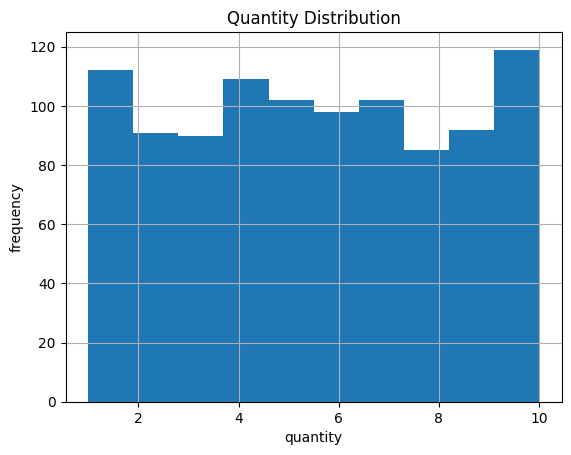

In [20]:
#Quantity distribution
df['Quantity'].hist(bins=10)
plt.title('Quantity Distribution')
plt.xlabel('quantity')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

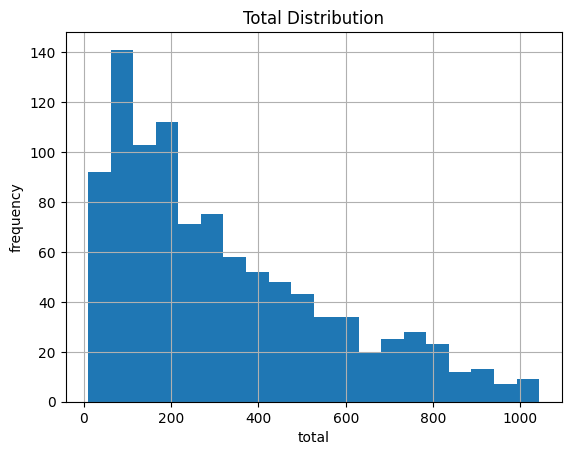

In [23]:
#Total Distribution
df['Total'].hist(bins=20)
plt.title('Total Distribution')
plt.xlabel('total')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

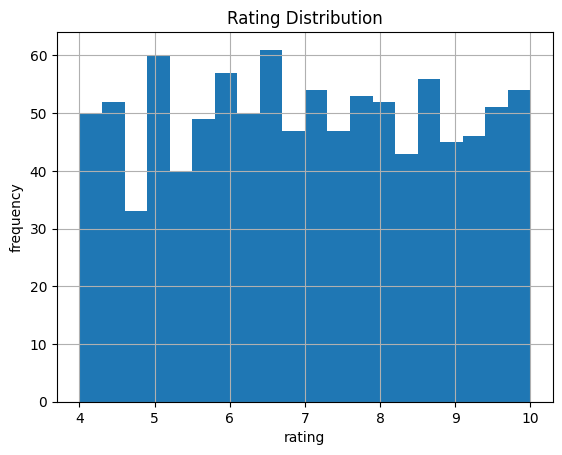

In [25]:
#Rating Distribution
df['Rating'].hist(bins=20)
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('frequency')

8. **`## Bivariate / Multivariate Analysis`**

   > Relationships between sales and other variables (branch, product line, customer type, etc.)



9. **`##  Key Insights & Conclusions`**



10. **`## Limitations & Next Steps`**

    > Notes on data quality, what couldn’t be answered, and ideas for future analysis.

